Machine Learning tutorial
==============================================
In the following tutorial you will get a basic introduction into practical machine learning. 
Please make sure that you installed the following dependencies:
numpy version 1.10.4
sklearn version 0.17.1
matplotlib version 1.5.1
Note that anaconda supports all these packages. For questions please contact: markusmichael.rau@googlemail.com

The following section reads in some packages, defines some constants for plotting and reads in the data.

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
%matplotlib inline


llinewidth = 3
label_fontsize = 18
title_fontsize = 22
legend_fontsize = 14
tick_fontsize = 16
ppointsize = 8
ccapsize = 12

data = np.loadtxt('input_data.dat', skiprows=1)
#I almost always shuffle data beforehand to remove any spurious order which 
#can be important for some machine learning algorithms
np.random.shuffle(data)

Step 1: Familiarize yourself with the data!
-------------------------------------------
It is very important to familiarize yourself with the data before you start performing machine learning procedures on it. Make a couple of plots that show the correlation between different input features, try to interpret them in terns of the photometric properties of stars and galaxies. Try out different feature combinations to see which discriminate the data better. Try to identify outlier in the data and anomalies.

Star-galaxy separation classification
--------------------------------------
We will now classify the objects in the dataset into either being a star or a galaxy based on their photometry alone. As noted in the introduction please make sure you hold out RANDOMLY a certain part of the data for testing. Do not touch this datajunk during any part of training. We further split up a junk of data for crossvalidation (to tune the model).

In [2]:
np.random.shuffle(data)
test = data[:4000, :]
train = data[4000:8000, :]
cv = data[8000:, :]


Now we generate an instance of the Random Forest algorithm that we want to use to separate stars from galaxies and fit it to the training data. We then make a prediction on the cv dataset and record the result.

In [3]:
#model = RandomForestClassifier(min_samples_leaf=1, n_estimators=1)

model = RandomForestClassifier()
model.fit(train[:, 3:], train[:, 1])
star_galaxy_pred_cv = model.predict(cv[:, 3:])

In [4]:
print(classification_report(cv[:, 1], star_galaxy_pred_cv, target_names=['Galaxy', 'Star']))

             precision    recall  f1-score   support

     Galaxy       0.91      0.98      0.94      6942
       Star       0.91      0.70      0.79      2352

avg / total       0.91      0.91      0.90      9294



Your task is now to play around with the model. Change the number of trees you use and the number of objects that maximally fall into the grown trees. Can you interpret them in terms of the Bias-Variance tradeoff? If your are done with everything and are fine with your model apply it to the test data to get a good estimate how well you would perform on new actual data. But don't touch it before that and don't change the model afterwards.

Photometric redshift estimation
-------------------------------
As an example for a typical regression problem, we will consider the problem of photometric redshift estimation. Photometric redshift estimation is a vital requirement for precision cosmology and currently one of the most important systematics in large imaging surveys like DES or CFHTLS. Instead of classificaiton we predict a continuous numerical variable, the distance or redshift of the object. The overall procedure of is however identical to the validation case. 

In [5]:
np.random.shuffle(data)
test = data[:4000, :]
train = data[4000:8000, :]
cv = data[8000:, :]

In [6]:
model = RandomForestRegressor()
model.fit(train[:, 3:], train[:, 2])
photoZ_pred_cv = model.predict(cv[:, 3:])

Please play around with the arguments to the RandomForestRegressor and try to see which setup gives you the best error on the cross validation data. Again try to interpret your results with respect to the bias-variance tradeoff. Use the mean squared error as a metric to tune your algorithm. If you are satisfied make predictions on the test set using your final model. This will give you an estimate of how well you would do on unknown data. Again do not tough the test data before you are finished with all tuning steps and do not refine your model after it has seen the test data. 


(0.0, 1.5)

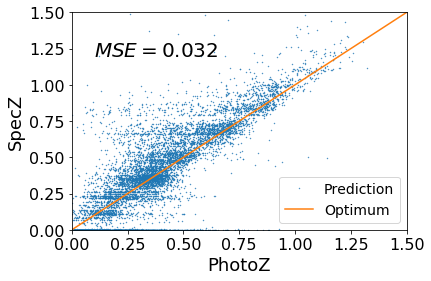

In [7]:
plt.plot(photoZ_pred_cv, cv[:, 2], '.', label='Prediction', ms=0.8)
plt.plot(np.linspace(0.0, 2.0), np.linspace(0.0, 2.0), label='Optimum')
plt.text(0.1, 1.2, r'$MSE = '+str(round(np.mean((photoZ_pred_cv - cv[:, 2])**2), 3))+'$', 
         fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=tick_fontsize)
plt.xlabel('PhotoZ', fontsize=label_fontsize)
plt.ylabel('SpecZ', fontsize=label_fontsize)
plt.legend(fontsize=legend_fontsize, loc='lower right')
plt.xlim([0.0, 1.5])
plt.ylim([0.0, 1.5])

Deep Learning (from https://machinelearningmastery.com/object-recognition-convolutional-neural-networks-keras-deep-learning-library/)
----------
In the next section we will use a deep neural network to perform a standard image classification task. Lets use the cifar dataset. We load in all necessary python packages and the cifar10 dataset. It consists of 60 000 small images that represent 10 classes: Cars, Horses, boats, etc.

The following code visualizes these images

/Users/markusmichaelrau/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.
/Users/markusmichaelrau/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


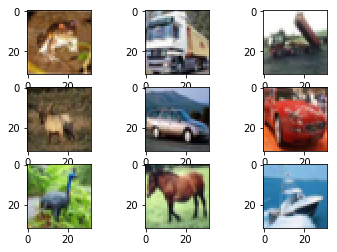

In [8]:
from keras.datasets import cifar10
from matplotlib import pyplot
from scipy.misc import toimage
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(toimage(X_train[i]))
# show the plot
pyplot.show()

We next fix a random seed that allows us to reproduce our results across the runs. Note that a random number generator is used to initialize the weights. A deep network can therefore yield different results depending on which initialization values are picked.

In [10]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [11]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Normalize the input such that the input is between [0, 1]. This is important as the neural network activatin function is a sigmoid. During training we want to stay within a region where the gradient in the sigmoid is largest. Having too extreme values in the input therefore "saturates" the activation, which can lead to slow training

In [12]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Setup a standard Convolutional Neural Network model. Play around with the setup a bit.

We use a simple convolutional neural network that consists of: 

* Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function and a weight constraint of max norm set to 3.
* Dropout set to 20%. Dropout randomly omitts the throughput from a neuron and therefore introduces "randomness" into the training process. This is a form of regularization and reduces the effective complexity of the convoluational neural network. Increase this if you want to avoid overfitting.
* Convolutional layer, 32 feature maps with a size of 3×3, a rectifier activation function and a weight constraint of max norm set to 3.
* Max Pool layer with size 2×2. Max pooling downsamples a convolutional layer by only keeping the representations that have the maximum throughput.
* Flatten layer.
* Fully connected layer with 512 units and a rectifier activation function.
* Dropout set to 50%.
* Fully connected output layer with 10 units and a softmax activation function.
* A dens network is just a normal fully connected Neural Network

In [ ]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________

In [ ]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
 8128/50000 [===>..........................] - ETA: 4:09 - loss: 2.0828 - acc: 0.2336